# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.


De acuerdo al conocimiento general que se puede tener en la sociedad y datos generales, los datos que pueden representar el costo de una propiedad son los siguientes:

<br />Antiguedad de la propiedad
<br />Precio de mercado, posiblemente saber el precio de la propiedad de 20 años atras a la fecha
<br />Ubicacion
<br />Tamaño de la propiedad
<br />Número de recamaras o espacio


### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# Se importan la librerías con las que inicialmente se trabajará
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() 


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# Cargamos el dataset y observamos el número de columnas y filas
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
Properati=pd.DataFrame(data)
data.shape

(146660, 19)

In [3]:
#Inpeccionamos el tipo de datos que contiene el dataset
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
# Indetificamos el total de valores faltantes por columna
data.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [5]:
# Agrupamos por tipo de propiedades de mayor a menor

Property_Type=pd.DataFrame(data.groupby("property_type",sort=True)["property_type"].count().reset_index(name="Total"))
Property_Type.sort_values(by=["Total"], ascending=False,inplace=True, ignore_index=True)
Property_Type

,property_type,Total
0,Departamento,107326
1,Casa,21521
2,PH,14298
3,Lote,1312
4,Oficina,658
5,Otro,374
6,Local comercial,325
7,Casa de campo,322
8,Depósito,265
9,Cochera,259


4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

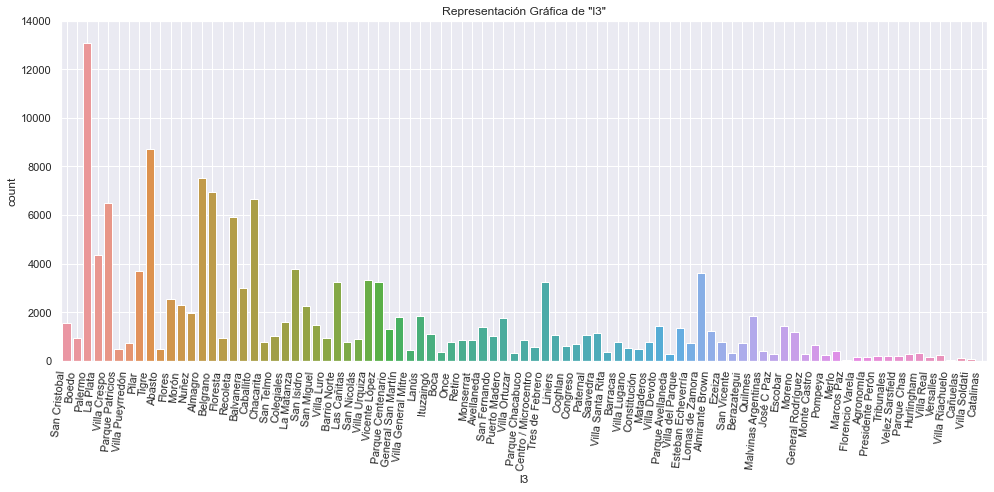

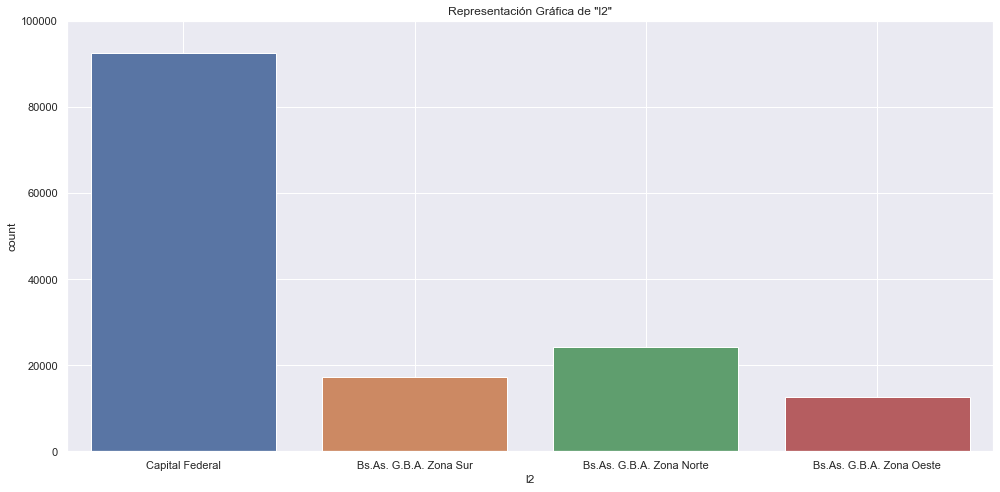

In [6]:
# Graficamos las variables l2 y l3 para observar graficamente su distribución

plt.figure(figsize = (27,7))
plt.subplot(1,2,1)
ax=sns.countplot(data = data, x = "l3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.title('Representación Gráfica de "l3"')
plt.tight_layout()
plt.ylim(0,14000)
plt.grid(True)

plt.figure(figsize = (27,7))
plt.subplot(1,2,2)
ax=sns.countplot(data = data, x = "l2")
plt.title('Representación Gráfica de "l2"')
plt.tight_layout()
plt.ylim(0,100000)
plt.grid(True)


5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [7]:
# Filtramos el dataset por los tipos de propiedades mas representativos y el área donde se localizan
Principales = data[((data.property_type=="PH") | (data.property_type=="Departamento") | (data.property_type=="Casa"))
                   & (data.l2=="Capital Federal")]

print(Principales.shape)
Principales.property_type.value_counts()

(91485, 19)


Departamento    79029
PH               9764
Casa             2692
Name: property_type, dtype: int64

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [8]:
# A. Obtenemos los principales estadisticos de nuestro filtrado del punto 5
Principales.describe()


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [9]:
#B. Por medio de la función "quantile" podemos observar cual es el valor que corresponde al 95% de la columna "surface_total".
Principales["surface_total"].quantile(0.95)


250.0

In [10]:
# Indentificamos cual es el tamaño del dataset tomando el 95% de los valores de "surface_total"
F_SurfaceTotal=Principales[Principales.surface_total < 250]
F_SurfaceTotal.shape

(78437, 19)

In [11]:
#C. Por medio de la función "quantile" podemos observar cual es el valor que corresponde al 95% de la columna "surface_covered".
Principales["surface_covered"].quantile(0.95)

200.0

In [12]:
# Indentificamos cual es el tamaño del dataset tomando el 95% de los valores de "surface_covered"
F_SurfaceCovered=Principales[Principales.surface_covered < 200]
F_SurfaceCovered.shape

(77853, 19)

In [13]:
#Realizamos un filtrado con los valores menores al 95% de "surface_total" y "surface_covered"
filter_Surface= Principales[(Principales.surface_covered <= 200) & (Principales.surface_total <= 250)]

filter_Surface.shape

(76912, 19)

In [14]:
#D. Identificamos el número de errores, donde "surface_coreved" es mayor a "surface_total"
Errores= filter_Surface[filter_Surface.surface_total < filter_Surface.surface_covered]
Errores.shape

(592, 19)

In [15]:
#Borramos los errores identificados en el punto anterior
filter_Surface=filter_Surface.drop(filter_Surface[filter_Surface.surface_total < filter_Surface.surface_covered].index)

In [16]:
filter_Surface.shape

(76320, 19)

(0.0, 270.0)

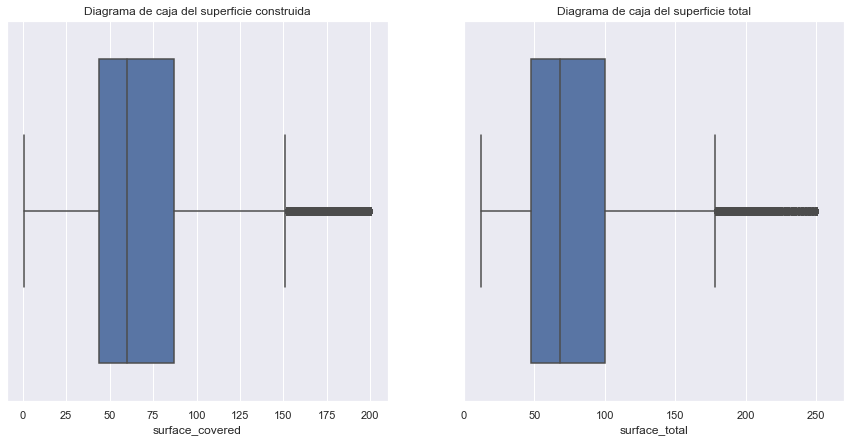

In [17]:
#Con los filtros ateriores, graficamos por medio de un boxplot la distribución de surface_total y surface_covered

plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.boxplot(data=filter_Surface, x="surface_covered")
plt.title('Diagrama de caja del superficie construida')

plt.subplot(1,2,2)
sns.boxplot(data=filter_Surface, x="surface_total")
plt.title('Diagrama de caja del superficie total')
plt.xlim(0,270)

In [18]:
#E. Indetificamos los valores menores al 98% de la columna "price"
Principales["price"].quantile(0.98)

1200000.0

(0.0, 1200000.0)

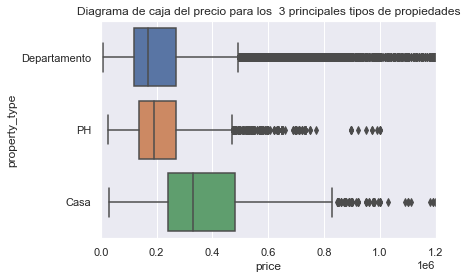

In [19]:
#Con lo valores identificados del punto anterior, graficamos la distribución de "price" por los 3 tipos de propiedades mas representativos.
sns.boxplot(data=Principales, x="price", y = "property_type")
plt.title('Diagrama de caja del precio para los  3 principales tipos de propiedades')
plt.xlim(0,1200000)

In [20]:
#Realizamos un filtro final considerando los precios de las propiedades por debajo de 1,200,000.00
filter_final= filter_Surface[(filter_Surface.price <= 1200000)]

filter_final.shape

(76058, 19)

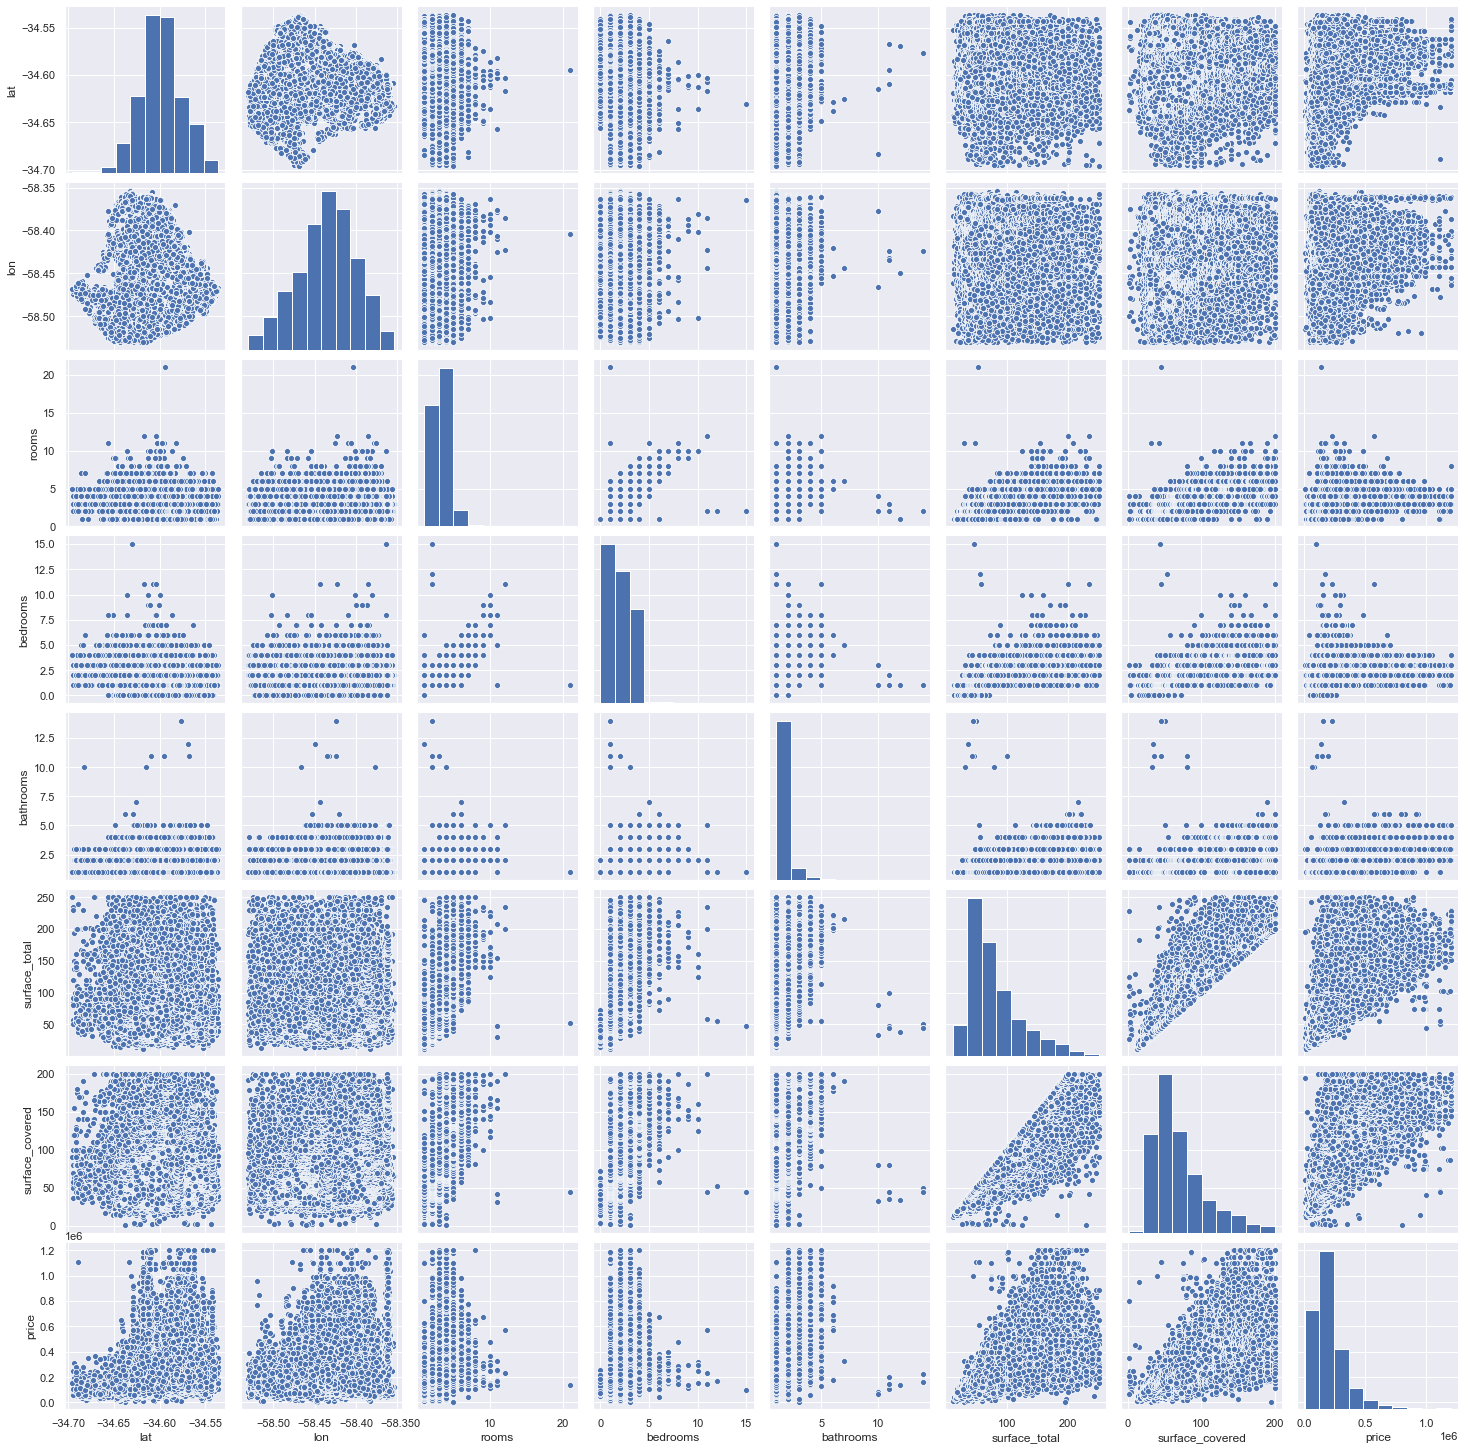

In [21]:
#E. Graficamos un pairplot para ver la relación cruzada entre todas las variables 
sns.pairplot(filter_final)

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [22]:
# Filtramos las varibales a analizar
Correlacion=filter_final[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]
Correlacion.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [23]:
# Observamos la correlación de las variables
Correlacion=Correlacion.corr()


In [24]:
Correlacion

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.930809,0.535103,0.750496,0.790071,0.503695
bedrooms,0.930809,1.000000,0.540020,0.732093,0.775076,0.483384
bathrooms,0.535103,0.540020,1.000000,0.629597,0.667974,0.641597
surface_total,0.750496,0.732093,0.629597,1.000000,0.929571,0.706950
surface_covered,0.790071,0.775076,0.667974,0.929571,1.000000,0.747461
price,0.503695,0.483384,0.641597,0.706950,0.747461,1.000000


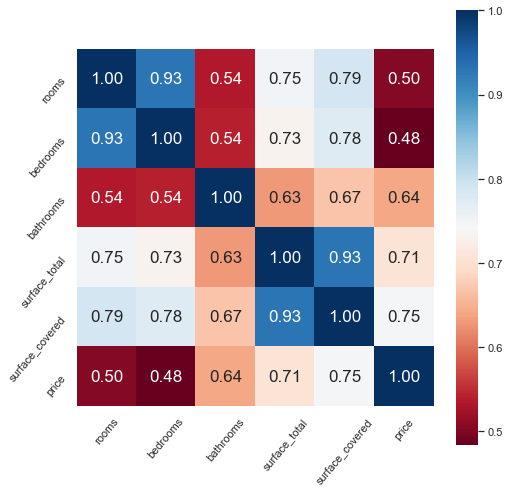

In [25]:
#Graficamos las correlaciones en un mapa de calor
plt.figure(figsize=(8,8))
sns.heatmap(Correlacion, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 17},
            xticklabels= Correlacion.columns, yticklabels= Correlacion.columns,cmap= 'RdBu')

plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.show()

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [26]:
data.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


In [27]:
Desafio=pd.DataFrame(data)

In [28]:
Desafio.shape

(146660, 19)

In [29]:
Desafio=pd.DataFrame(Desafio[["l2", "rooms", "bathrooms", "surface_total", "surface_covered", "price"]])


In [30]:
Desafio.head(2)

,l2,rooms,bathrooms,surface_total,surface_covered,price
0,Capital Federal,7.0,2.0,140.0,140.0,153000.0
1,Capital Federal,2.0,2.0,70.0,58.0,159000.0


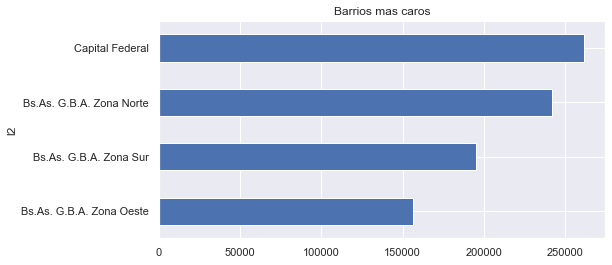

In [31]:
#Agrupamos el Dataset por la media de precios por las ciudades del Dataset
plt.figure(figsize=(8,4))
Desafio.price.groupby([Desafio["l2"]]).mean().sort_values(ascending=True).plot(kind="barh", title="Barrios mas caros")
# plt.xticks(rotation = 20)


---
# Para analizar (Desafio)
<br />¿Cuál es el barrio más caro de Buenos Aires?

<br />De acuerdo al análisis realizado, tomando el precio promedio por barrios, el barrio mas caro es "Capital Federal", sin embargo el analisis, tiene valores faltantes y no contempla la distribución del precio,  por lo que este resultado no puede ser 100% confiable

---

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [32]:
# Importamos la librerias a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set() 

In [33]:
data1 = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data1.shape

(146660, 19)

In [34]:
data1.head(2)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


In [35]:
#1. Usamos las propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
Principales1 = data[((data.property_type=="PH") | (data.property_type=="Departamento") | 
                     (data.property_type=="Casa")) & (data.l2=="Capital Federal")]

Principales1.shape

(91485, 19)

In [36]:
#2. Seleccionmos aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
filter_Surface1= Principales1[(Principales1.surface_total <= 1000) & (Principales1.surface_total >= 15)]
filter_Surface1.shape

(82405, 19)

In [37]:
#3 Seleccionamos las propiedades con precio menor 4000000 dólares.
filter_final1= filter_Surface1[(filter_Surface1.price <= 4000000)]

filter_final1.shape

(82373, 19)

In [38]:
#4  Seleccionamos las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
Properati=filter_final1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

In [39]:
#5 Borramos los valores faltantes
Properati.dropna(inplace=True)

<ipython-input-39-a580bdddfbb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Properati.dropna(inplace=True)


In [40]:
Properati.shape

(81019, 6)

In [41]:
Properati.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [42]:
#Obtenemos la correlación para ver que variables podemos ocupar para nuestro modelo
Properati.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


In [43]:
#Definimos las caracteristicas a ocupar y nuestra target

X = Properati[["surface_covered","bathrooms","rooms"]]

y = Properati.price

In [44]:
X.head(2)

,surface_covered,bathrooms,rooms
0,140.0,2.0,7.0
1,58.0,2.0,2.0


In [45]:
# Importamos la metrica a ocupar, en este caso r2_score y 3 variables, las cuales
# tienen mayor correlación con la target, que de acuerdo con esta métrica a mayor features o variables, 
# el nivel de prescición aumenta

from sklearn.metrics import r2_score


In [46]:
# Realizamos un Train/Test split de los datos.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [47]:
#Importamos los modelos a ocupar

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [48]:
#Importamos el modelo a ocupar de Benchmark

from sklearn.linear_model import LinearRegression

In [49]:
#Evaluamos los modelos con hiperparametros iniciales
linear_modelP = LinearRegression()
tree_regressorP = DecisionTreeRegressor(max_depth=5, random_state=42)
knn_regressorP = KNeighborsRegressor(n_neighbors=5)

In [50]:
linear_modelP.fit(X_train, y_train)  #modelo de benchmark 
tree_regressorP.fit(X_train, y_train)
knn_regressorP.fit(X_train, y_train)

KNeighborsRegressor()

In [51]:
modelos = ['Regresión lineal (Benchmark)', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_modelP, tree_regressorP, knn_regressorP]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = r2_score(y_train, y_train_pred)
    rmse_test = r2_score(y_test, y_test_pred)
    print(f'R2_Score en Train: {rmse_train}')
    print(f'R2_Score en Test: {rmse_test}\n') 

Modelo: Regresión lineal (Benchmark)
R2_Score en Train: 0.4379369217599647
R2_Score en Test: 0.4192649751840565

Modelo: Árbol de Decisión
R2_Score en Train: 0.6730268858489821
R2_Score en Test: 0.6670736878304149

Modelo: Vecinos más cercanos
R2_Score en Train: 0.7892664260587279
R2_Score en Test: 0.7004403627725748



In [52]:
# Realizamos una curva de validación para el modelo de KNeighborsRegressor
lista_r2_train = []
lista_r2_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    
    # Definir el modelo con el valor de vecinos deseado
    KNN_R = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    KNN_R.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = KNN_R.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = KNN_R.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_r2_train.append(train_r2)
    lista_r2_test.append(test_r2)

Text(0, 0.5, 'Exactitud')

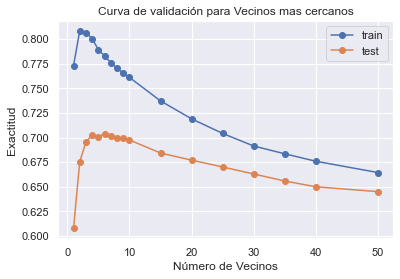

In [53]:
#Graficamos la curva
plt.plot(k_vecinos,lista_r2_train,'o-',label='train' )
plt.plot(k_vecinos,lista_r2_test,'o-',label='test')
plt.title('Curva de validación para Vecinos mas cercanos')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Exactitud')

In [54]:
# Realizamos una curva de validación para el modelo de DecisionTreeRegressor
lista_r2Tree_train = []
lista_r2Tree_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,16,19]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    
    # Definir el modelo con el valor de profundidad
    TreeR = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    TreeR.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = TreeR.predict(X_train)
    train_Tr2 = r2_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = TreeR.predict(X_test)
    test_Tr2 = r2_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_r2Tree_train.append(train_Tr2)
    lista_r2Tree_test.append(test_Tr2)

Text(0, 0.5, 'Exactitud')

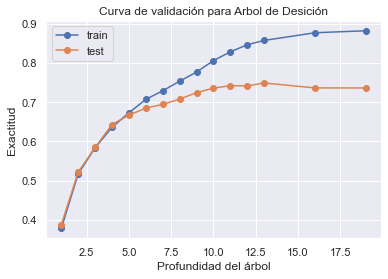

In [55]:
#Graficamos la curva de validación
plt.plot(max_depths,lista_r2Tree_train,'o-',label='train' )
plt.plot(max_depths,lista_r2Tree_test,'o-',label='test')
plt.title('Curva de validación para Arbol de Desición')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

In [56]:
#Definimos los hiperparamtros a ocupar derivado de las curvas de validación
linear_model_Benchmark = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=13, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [57]:
#Entrenamos los modelos
linear_model_Benchmark.fit(X_train, y_train)  #modelo de benchmark 
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [58]:
#Observamos la ordenada y pendiente de nuestro modelo de benchmark 
print(linear_model_Benchmark.coef_, linear_model_Benchmark.intercept_)

[   296.23104259 183470.01365072  26280.28483192] -126005.38059387589


Modelo: Regresión lineal (Benchmark)
R2_Score en Train: 0.4379369217599647
R2_Score en Test: 0.4192649751840565


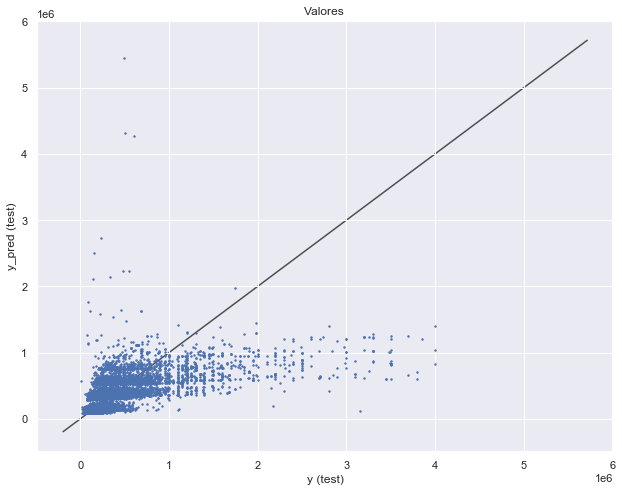

Modelo: Árbol de Decisión
R2_Score en Train: 0.8575223685864819
R2_Score en Test: 0.7489914991707978


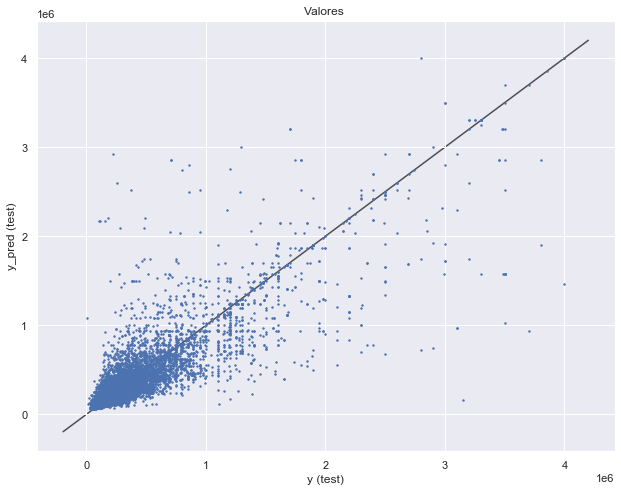

Modelo: Vecinos más cercanos
R2_Score en Train: 0.8066239611759173
R2_Score en Test: 0.695445832365291


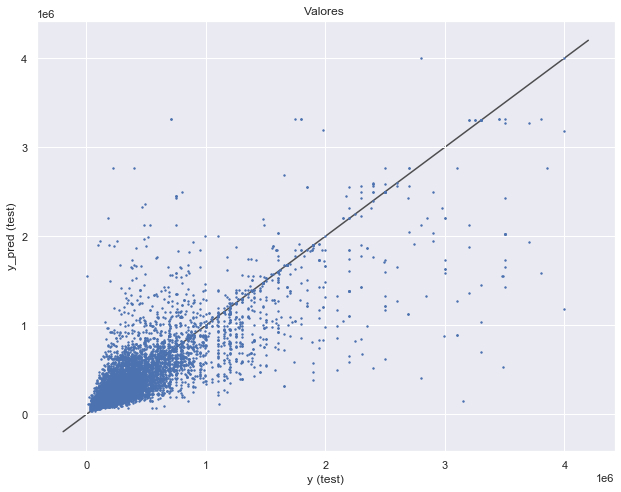

In [59]:
#Predecimos y graficamos los modelos ocupados
modelos = ['Regresión lineal (Benchmark)', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model_Benchmark, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = r2_score(y_train, y_train_pred)
    rmse_test = r2_score(y_test, y_test_pred)
    print(f'R2_Score en Train: {rmse_train}')
    print(f'R2_Score en Test: {rmse_test}')
    
    plt.figure(figsize = (17,7))

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    plt.title('Valores ')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

---
# Para analizar
<br />Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?
<br />De acuerdo a los modelos ocupados, el modelo Arbol de desición fue el que se aproxima mas a un 100% de precisión

<br />¿Qué información no estás usando que podría ayudar al modelo?
<br />A mi consideración la ubicación y/o barrio o colonia es muy importante, ya que pueden existir propiedades con una superfice total muy grande pero al estar en una ubicación donde exista por ejemplo delincuencia o se encuentre en una zona donde no hay servicios básicos (agua, luz, etc.) el precio debería ser menor al de sus caracteristicas o por el contrario una propiedad con caracteristicas muy básicas, pero se encuentra en una zona con alta plusvalia, esta debería tener un mayor precio

<br />¿Qué información puede estar demás o repetida?
<br />Las columnas "star_date" y "created_on" cuentan con información no relevante



---